# Firewall Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv('/content/Firewall_Data.csv')

In [3]:
# Getting the view of the data
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [4]:
# Summary statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [5]:
# Checking if there are any null values
null_counts = df.isnull().sum()
null_counts

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [6]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57170 entries, 0 to 65530
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           57170 non-null  int64 
 1   Destination Port      57170 non-null  int64 
 2   NAT Source Port       57170 non-null  int64 
 3   NAT Destination Port  57170 non-null  int64 
 4   Action                57170 non-null  object
 5   Bytes                 57170 non-null  int64 
 6   Bytes Sent            57170 non-null  int64 
 7   Bytes Received        57170 non-null  int64 
 8   Packets               57170 non-null  int64 
 9   Elapsed Time (sec)    57170 non-null  int64 
 10  pkts_sent             57170 non-null  int64 
 11  pkts_received         57170 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 5.7+ MB


In [7]:
# Stats
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,57170.000000,57170.000000,57170.000000,57170.000000,5.717000e+04,5.717000e+04,5.717000e+04,5.717000e+04,57170.000000,57170.000000,57170.000000
mean,50532.499738,8052.147035,22048.739549,3054.123491,1.113147e+05,2.564701e+04,8.566766e+04,1.177065e+02,75.116547,47.279255,70.427200
std,13880.680957,16513.145167,22141.986286,10363.545911,6.015189e+06,4.098545e+06,2.637029e+06,5.495436e+03,322.519323,3446.210063,2380.254144
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49450.000000,53.000000,0.000000,0.000000,7.000000e+01,7.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,54013.000000,443.000000,16362.500000,53.000000,1.930000e+02,9.400000e+01,9.000000e+01,2.000000e+00,26.000000,1.000000,1.000000
75%,58574.000000,445.000000,41883.750000,443.000000,1.139000e+03,5.080000e+02,6.690000e+02,1.000000e+01,31.000000,5.000000,4.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


# EDA

All Features

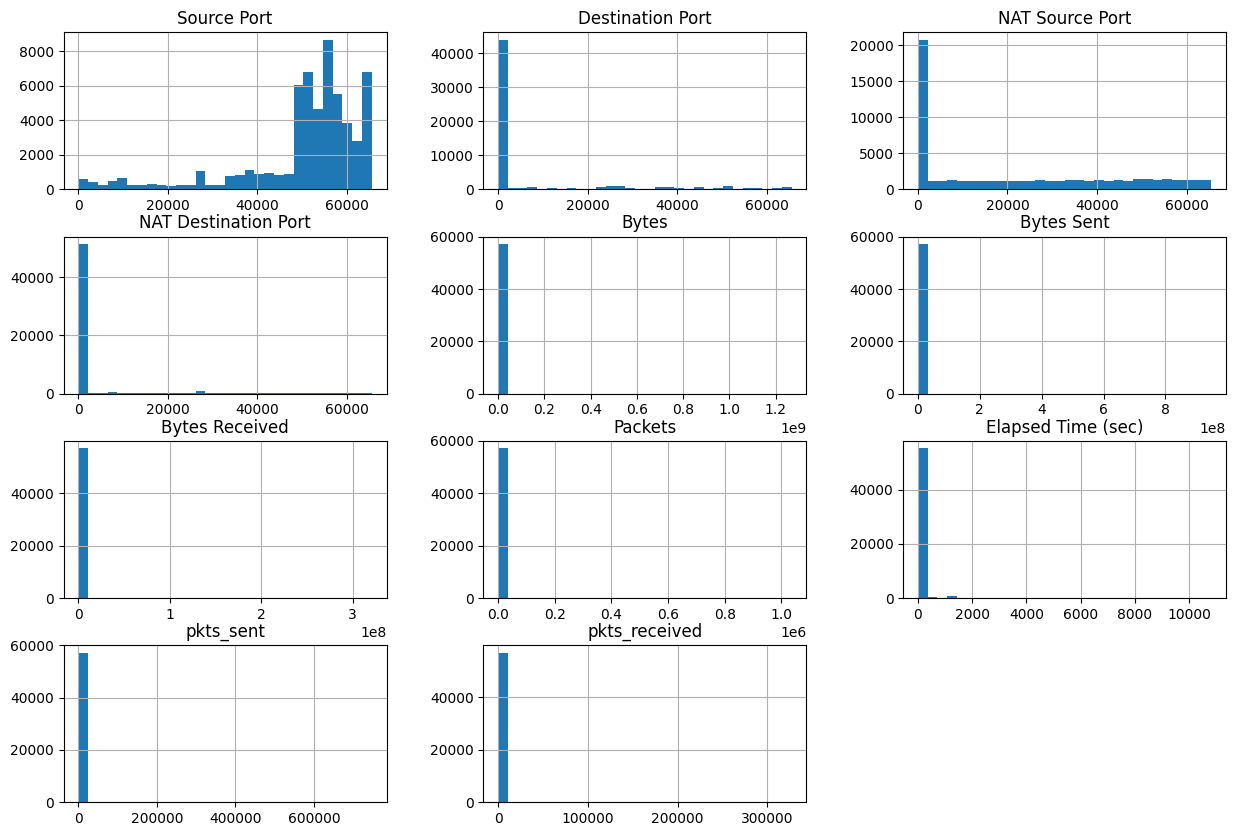

In [8]:
# Distribution of all features
df.hist(bins=30, figsize=(15, 10))
plt.show()

Target Variable

<ipython-input-9-e50bc856f73c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  action_plot = sns.countplot(data=df, x='Action', palette='Set2')


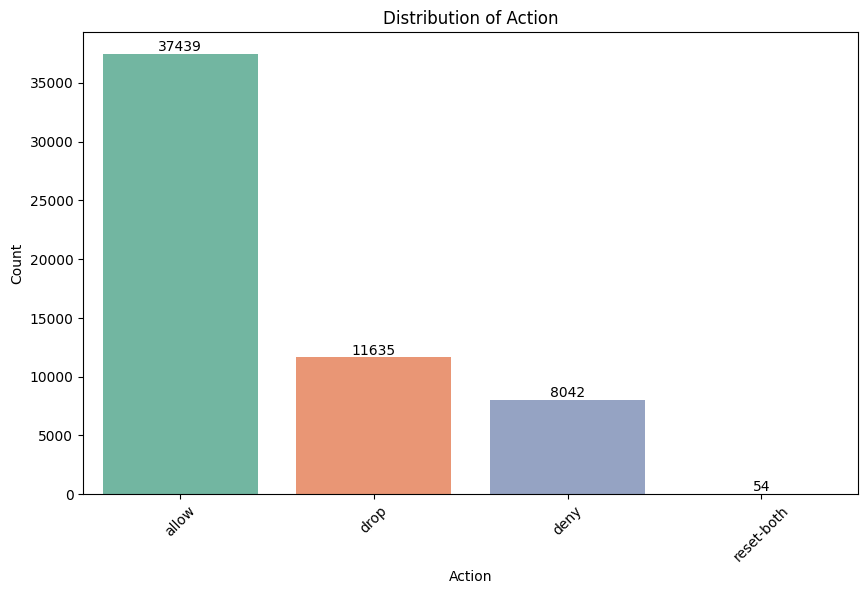

In [9]:
# Plotting the distribution of 'Action' feature with integer count labels
plt.figure(figsize=(10, 6))
action_plot = sns.countplot(data=df, x='Action', palette='Set2')

# Adding the integer count labels
for p in action_plot.patches:
    height = p.get_height()
    action_plot.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Action')
plt.xlabel('Action')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

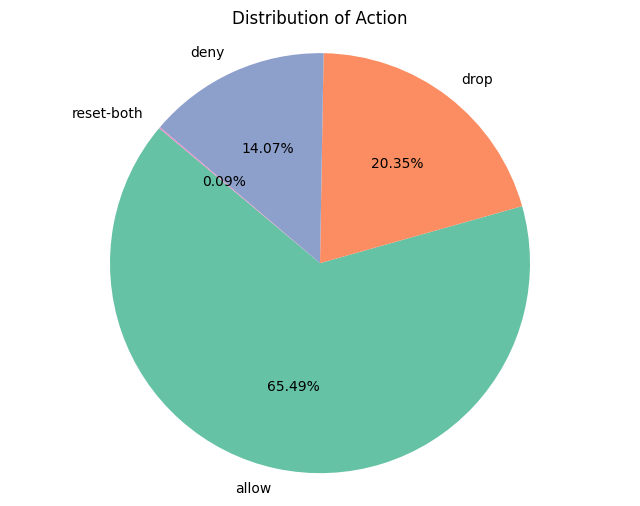

In [10]:
# Calculate percentages
action_counts = df['Action'].value_counts(normalize=True) * 100

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(action_counts, labels=action_counts.index, autopct='%1.2f%%', colors=plt.cm.Set2.colors, startangle=140)
plt.title('Distribution of Action')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Numerical columns

In [11]:
numerical_df_cols = ['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']
df[numerical_df_cols].describe()

,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,5.717000e+04,5.717000e+04,5.717000e+04,5.717000e+04,57170.000000,57170.000000,57170.000000
mean,1.113147e+05,2.564701e+04,8.566766e+04,1.177065e+02,75.116547,47.279255,70.427200
std,6.015189e+06,4.098545e+06,2.637029e+06,5.495436e+03,322.519323,3446.210063,2380.254144
min,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,7.000000e+01,7.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,1.930000e+02,9.400000e+01,9.000000e+01,2.000000e+00,26.000000,1.000000,1.000000
75%,1.139000e+03,5.080000e+02,6.690000e+02,1.000000e+01,31.000000,5.000000,4.000000
max,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [12]:
numerical_features = ['Bytes', 'Bytes Sent', 'Bytes Received','Packets', 'Elapsed Time (sec)',
                        'pkts_sent', 'pkts_received']

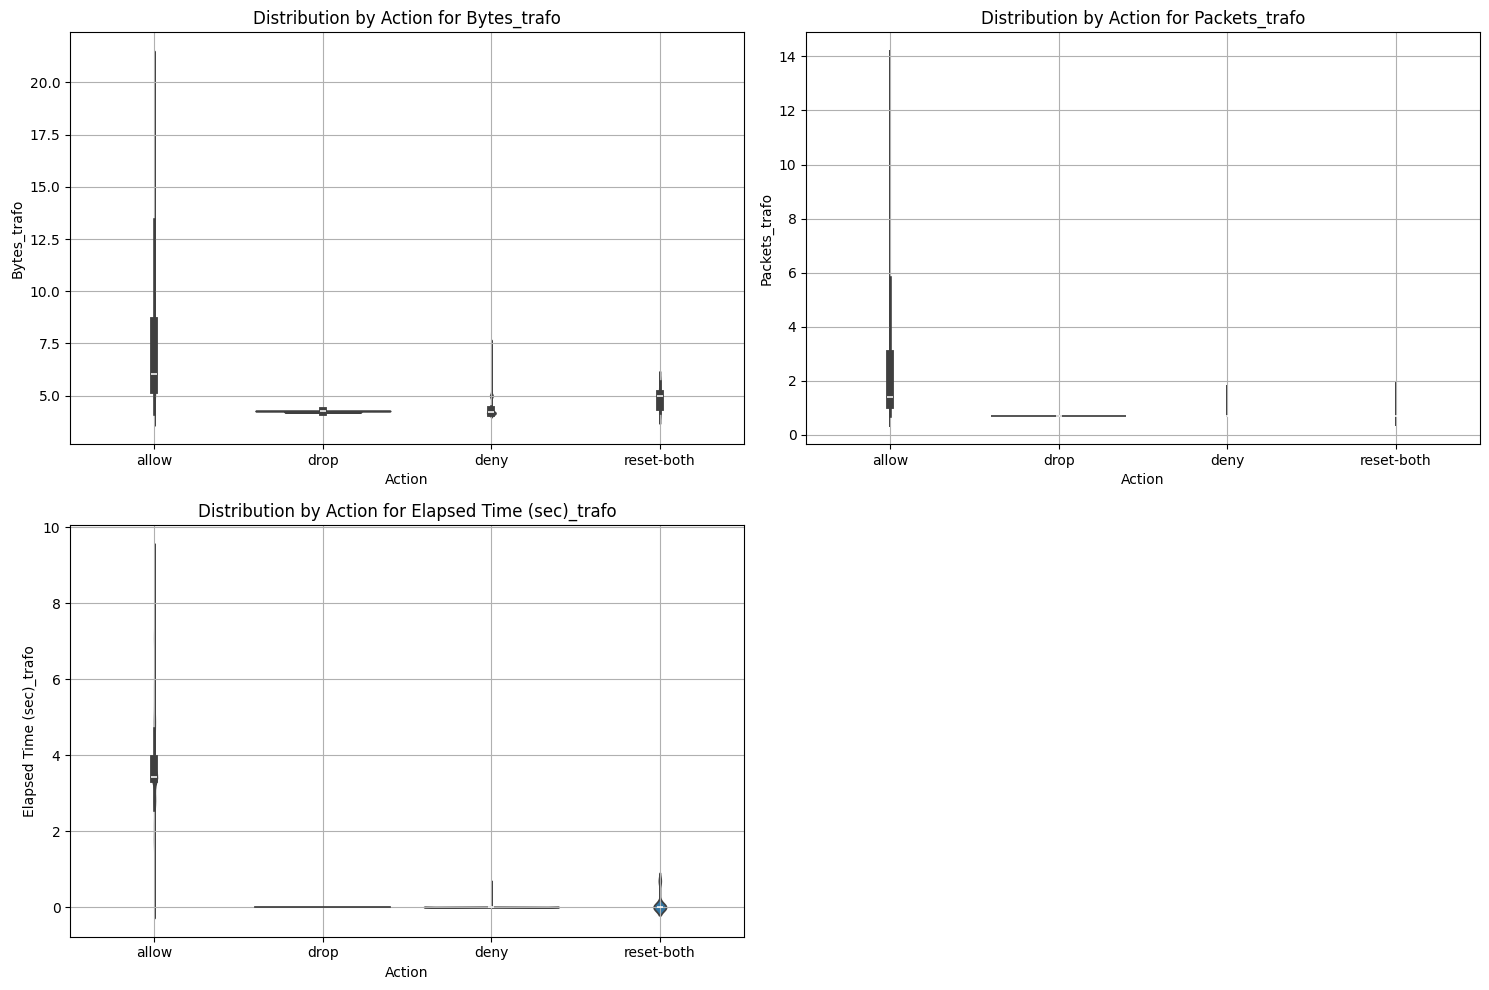

In [13]:
# List of numerical features
features_num = ['Bytes', 'Packets', 'Elapsed Time (sec)']

# Assume num_trafo is a function you have defined for transforming numerical features
def num_trafo(x):
    # Example transformation, you can replace this with your actual transformation logic
    return np.log1p(x)

# Apply transformation and create new features
for f in features_num:
    new_feature = f + '_trafo'
    df[new_feature] = num_trafo(df[f])

# List of transformed numerical features
features_num_trafo = [f + '_trafo' for f in features_num]

# Set up the grid layout
num_plots = len(features_num_trafo)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

# Plot the distribution for each transformed numerical feature
for i, f in enumerate(features_num_trafo):
    sns.violinplot(x='Action', y=f, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution by Action for {f}')
    axes[i].grid()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

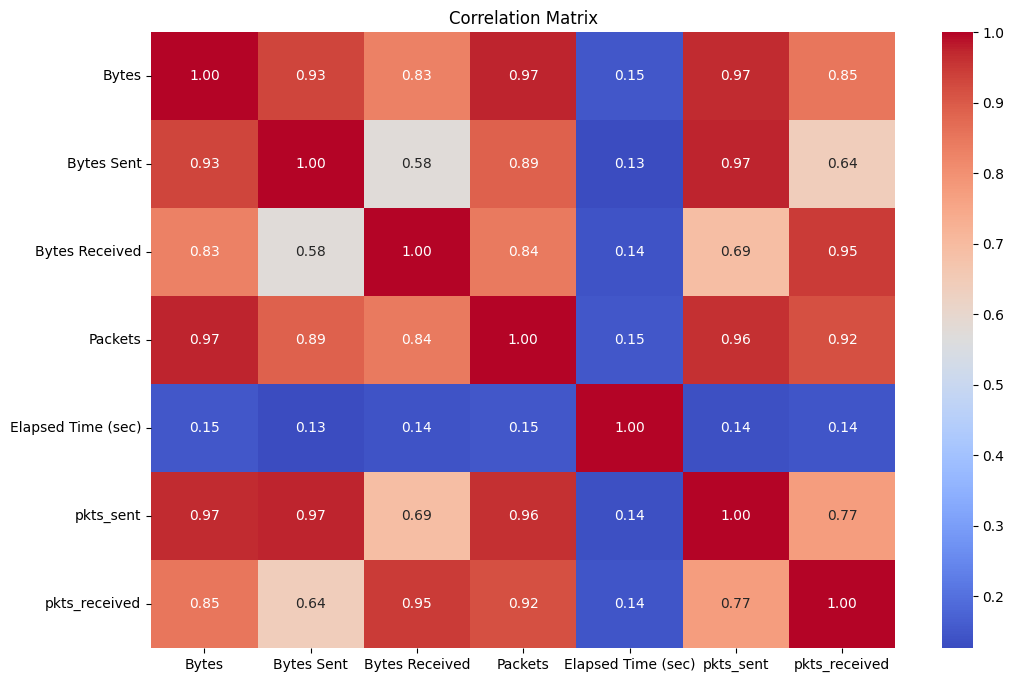

In [14]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Categorical columns

In [15]:
categorical_features = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']

In [16]:
# Categorical columns - Ports Count

categorical_df_cols = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']
distinct_source_ports = df['Source Port'].nunique()
distinct_destination_ports = df['Destination Port'].nunique()
distinct_nat_source_ports = df['NAT Source Port'].nunique()
distinct_nat_destination_ports = df['NAT Destination Port'].nunique()

distinct_ports_summary = {
    "Source Port": distinct_source_ports,
    "Destination Port": distinct_destination_ports,
    "NAT Source Port": distinct_nat_source_ports,
    "NAT Destination Port": distinct_nat_destination_ports
}

distinct_ports_summary


{'Source Port': 22724,
 'Destination Port': 3273,
 'NAT Source Port': 29152,
 'NAT Destination Port': 2533}

Feature: Source Port
Source Port
27005    513
57470    222
49418    209
6881     145
443      135
50584    116
26900    102
42298     84
3478      80
48817     77
Name: count, dtype: int64



<ipython-input-17-97d1df8be1d6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=f, order=df[f].value_counts().index[:10], palette='Set2')


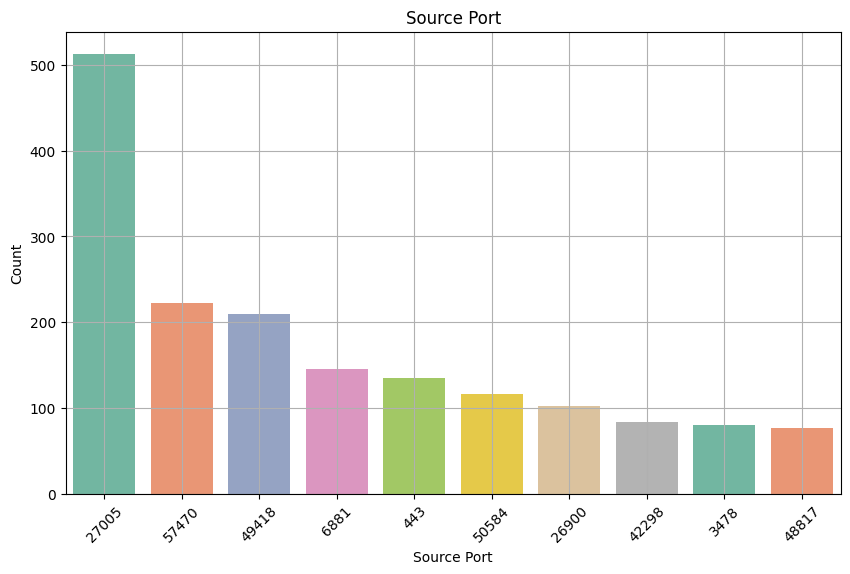

Feature: Destination Port
Destination Port
53       15389
443      11684
445      11674
80        4035
25174      686
22114      490
50584      460
64147      396
44847      382
23         344
Name: count, dtype: int64



<ipython-input-17-97d1df8be1d6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=f, order=df[f].value_counts().index[:10], palette='Set2')


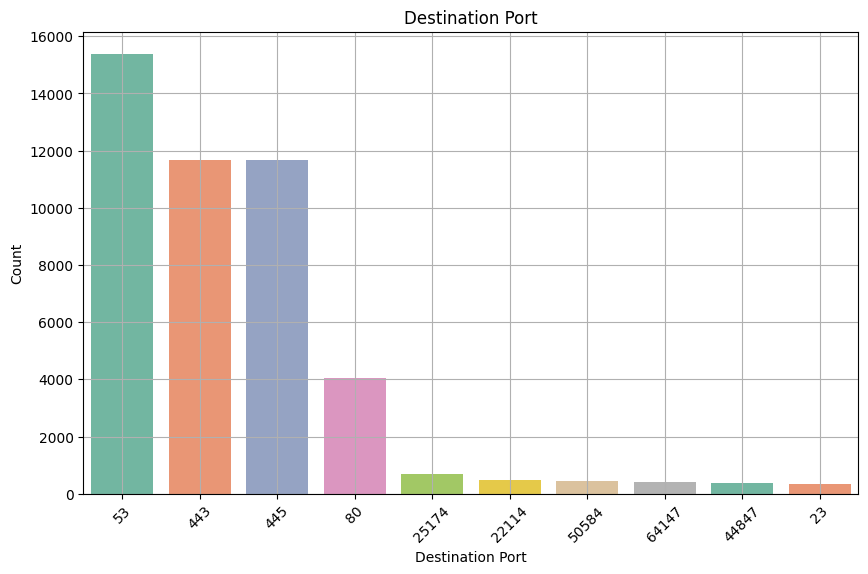

Feature: NAT Source Port
NAT Source Port
0        20125
48817       78
50116        9
58638        9
30399        5
43757        5
7986         5
57596        5
14591        5
60868        5
Name: count, dtype: int64



<ipython-input-17-97d1df8be1d6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=f, order=df[f].value_counts().index[:10], palette='Set2')


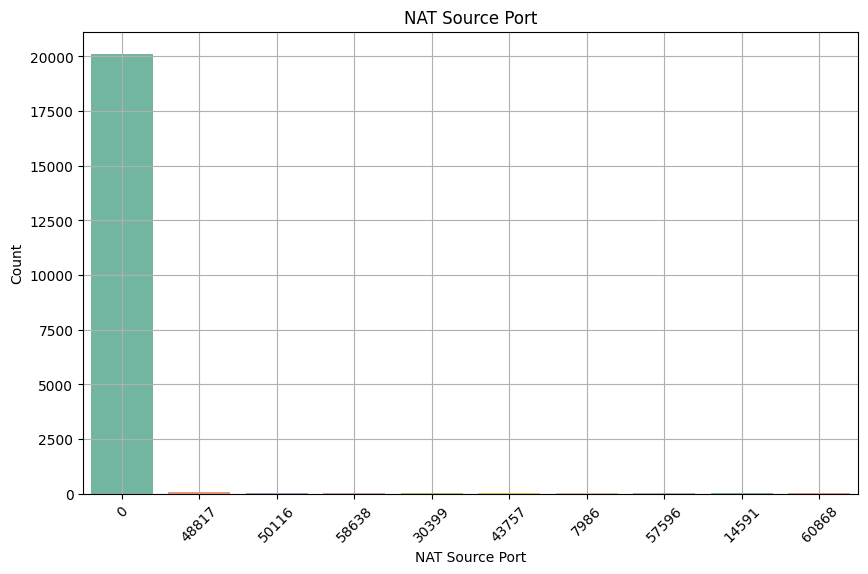

Feature: NAT Destination Port
NAT Destination Port
0        20125
53       15093
443      11678
80        4028
27015      234
27017      160
123        156
3389       156
6881       142
5228       100
Name: count, dtype: int64



<ipython-input-17-97d1df8be1d6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=f, order=df[f].value_counts().index[:10], palette='Set2')


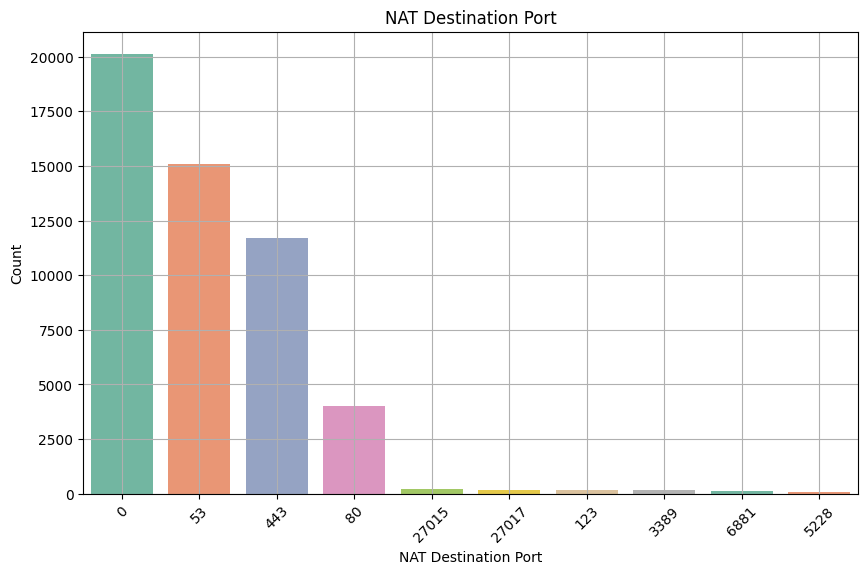

In [17]:
# Top 10 Categorical Columns

for f in categorical_features:
    # Print feature and top 10 value counts
    print('Feature:', f)
    print(df[f].value_counts().head(10))
    print()

    # Plot countplot using seaborn
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=f, order=df[f].value_counts().index[:10], palette='Set2')
    plt.title(f)
    plt.xlabel(f)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.show()

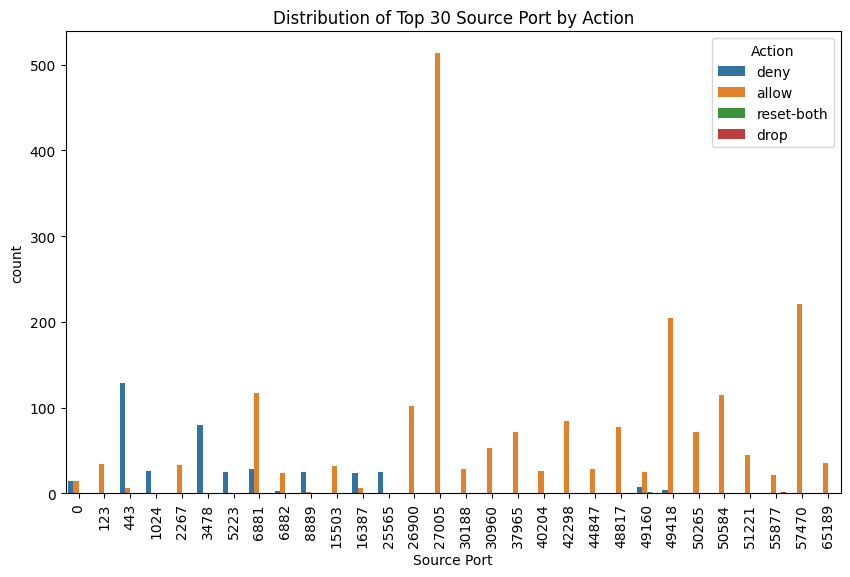

In [18]:
# Top 30 Source Port by Action

# Function to plot top N categories
def plot_top_n_categories(df, feature, n=30):
   top_n = df[feature].value_counts().nlargest(n).index
   df_top_n = df[df[feature].isin(top_n)]

   plt.figure(figsize=(10, 6))
   sns.countplot(x=feature, hue='Action', data=df_top_n)
   plt.title(f'Distribution of Top {n} {feature} by Action')
   plt.xticks(rotation=90)
   plt.show()


# Plot top N Source Ports
plot_top_n_categories(df, 'Source Port')


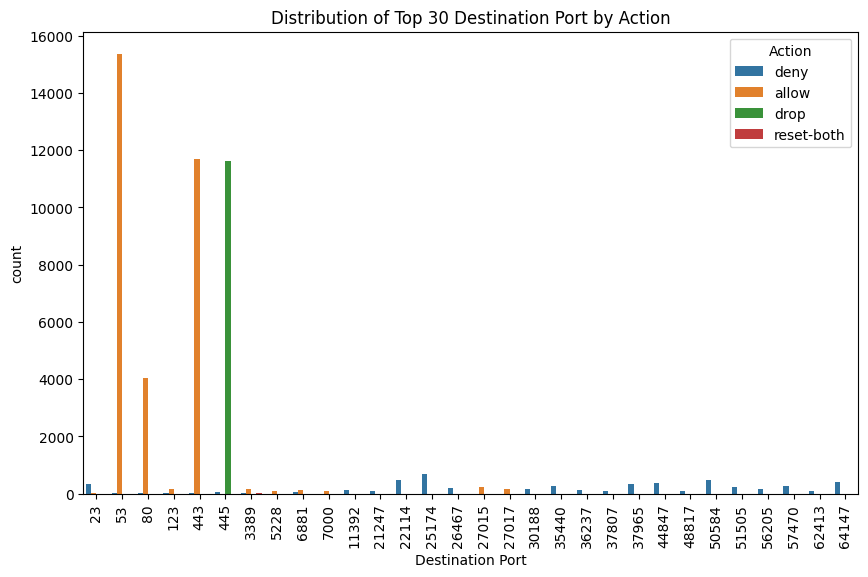

In [19]:
# Top 30 Destination Port by Action

# Function to plot top N categories
def plot_top_n_categories(df, feature, n=30):
   top_n = df[feature].value_counts().nlargest(n).index
   df_top_n = df[df[feature].isin(top_n)]

   plt.figure(figsize=(10, 6))
   sns.countplot(x=feature, hue='Action', data=df_top_n)
   plt.title(f'Distribution of Top {n} {feature} by Action')
   plt.xticks(rotation=90)
   plt.show()


# Plot top N Destination  Ports
plot_top_n_categories(df, 'Destination Port')


# Research and Hypotheses Questions


Are particular source and destination ports more likely to be involved in malicious network traffic?

In [20]:
# Define potentially malicious and non-malicious actions
malicious_actions = ['deny', 'drop', 'reset-both']

# Filter dataframe for malicious actions
malicious_df = df[df['Action'].isin(malicious_actions)]

# Filter dataframe for non-malicious actions
non_malicious_df = df[~df['Action'].isin(malicious_actions)]

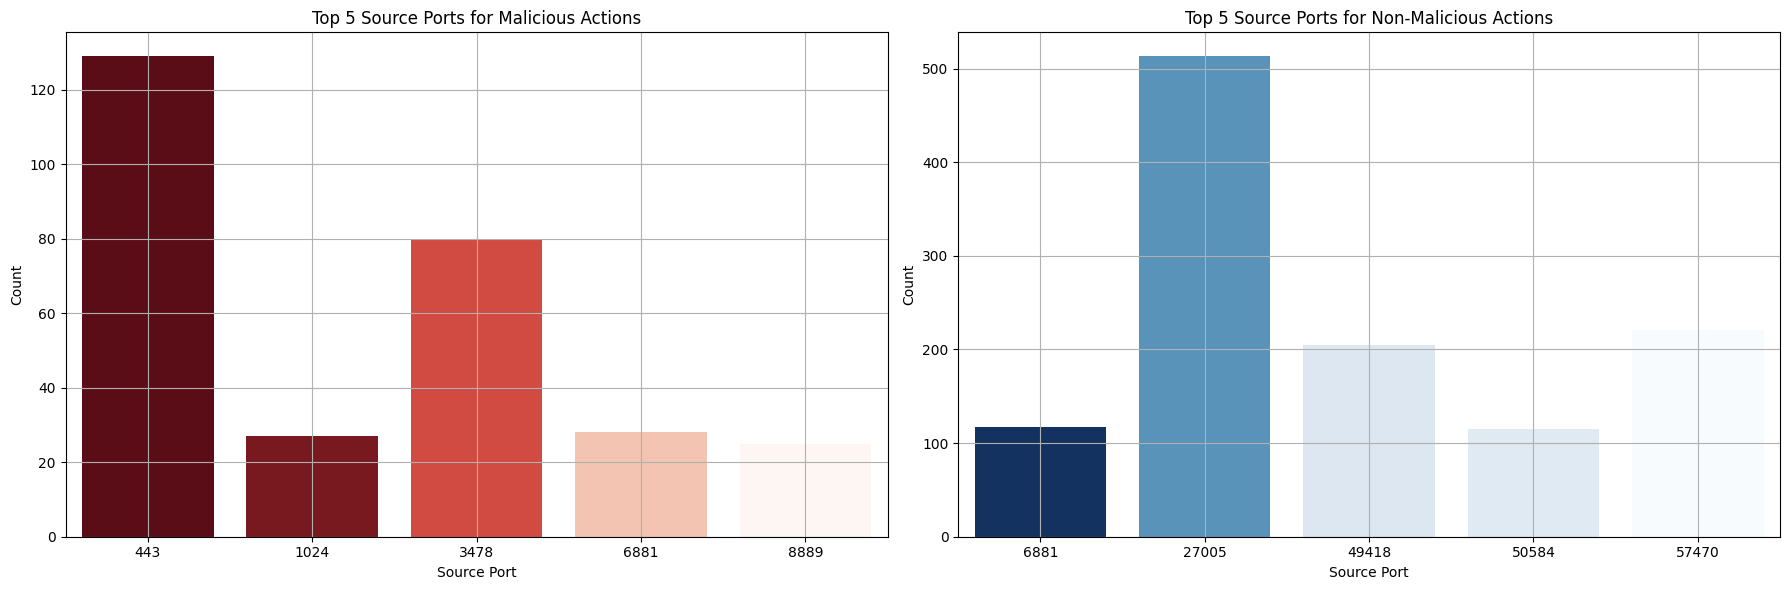

In [21]:
# Calculate frequency of top 5 source ports for malicious actions
top_source_ports_malicious = malicious_df['Source Port'].value_counts().head(5)

# Calculate frequency of top 5 source ports for non-malicious actions
top_source_ports_non_malicious = non_malicious_df['Source Port'].value_counts().head(5)

# Plot bar plots for top 5 source ports for both malicious and non-malicious actions
plt.figure(figsize=(18, 6))

# Plot for malicious actions
plt.subplot(1, 2, 1)
sns.barplot(x=top_source_ports_malicious.index, y=top_source_ports_malicious.values, hue=top_source_ports_malicious.index, palette='Reds_r', dodge=False)
plt.title('Top 5 Source Ports for Malicious Actions')
plt.xlabel('Source Port')
plt.ylabel('Count')
plt.legend([],[], frameon=False)  # Remove the legend
plt.grid(True)

# Plot for non-malicious actions
plt.subplot(1, 2, 2)
sns.barplot(x=top_source_ports_non_malicious.index, y=top_source_ports_non_malicious.values, hue=top_source_ports_non_malicious.index, palette='Blues_r', dodge=False)
plt.title('Top 5 Source Ports for Non-Malicious Actions')
plt.xlabel('Source Port')
plt.ylabel('Count')
plt.legend([],[], frameon=False)  # Remove the legend
plt.grid(True)

plt.tight_layout()
plt.show()


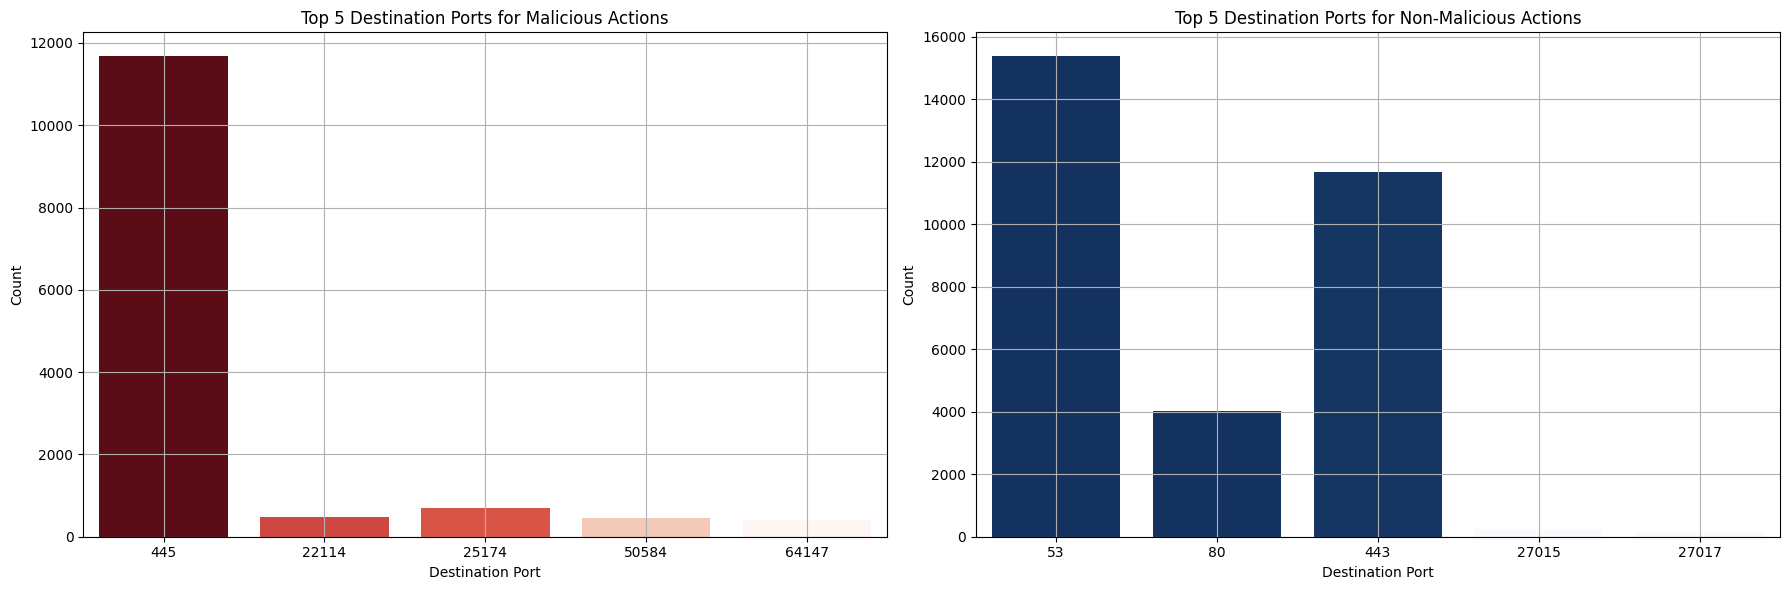

In [22]:
# Calculate frequency of top 5 destination ports for malicious actions
top_destination_ports_malicious = malicious_df['Destination Port'].value_counts().head(5)

# Calculate frequency of top 5 destination ports for non-malicious actions
top_destination_ports_non_malicious = non_malicious_df['Destination Port'].value_counts().head(5)

# Plot bar plots for top 5 destination ports for both malicious and non-malicious actions
plt.figure(figsize=(18, 6))

# Plot for malicious actions
plt.subplot(1, 2, 1)
sns.barplot(x=top_destination_ports_malicious.index, y=top_destination_ports_malicious.values, hue=top_destination_ports_malicious.index, palette='Reds_r', dodge=False)
plt.title('Top 5 Destination Ports for Malicious Actions')
plt.xlabel('Destination Port')
plt.ylabel('Count')
plt.legend([],[], frameon=False)  # Remove the legend
plt.grid(True)

# Plot for non-malicious actions
plt.subplot(1, 2, 2)
sns.barplot(x=top_destination_ports_non_malicious.index, y=top_destination_ports_non_malicious.values, hue=top_destination_ports_non_malicious.index, palette='Blues_r', dodge=False)
plt.title('Top 5 Destination Ports for Non-Malicious Actions')
plt.xlabel('Destination Port')
plt.ylabel('Count')
plt.legend([],[], frameon=False)  # Remove the legend
plt.grid(True)

plt.tight_layout()
plt.show()


Feature:Source Port - Top 10 levels only


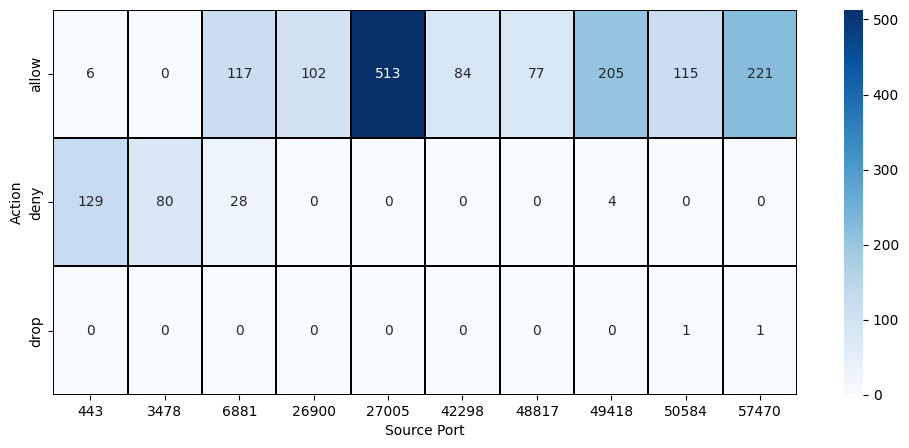

Feature:Destination Port - Top 10 levels only


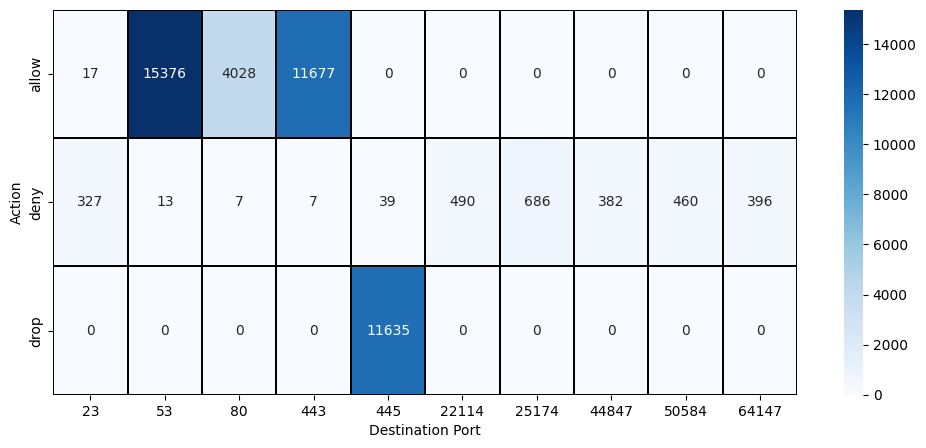

Feature:NAT Source Port - Top 10 levels only


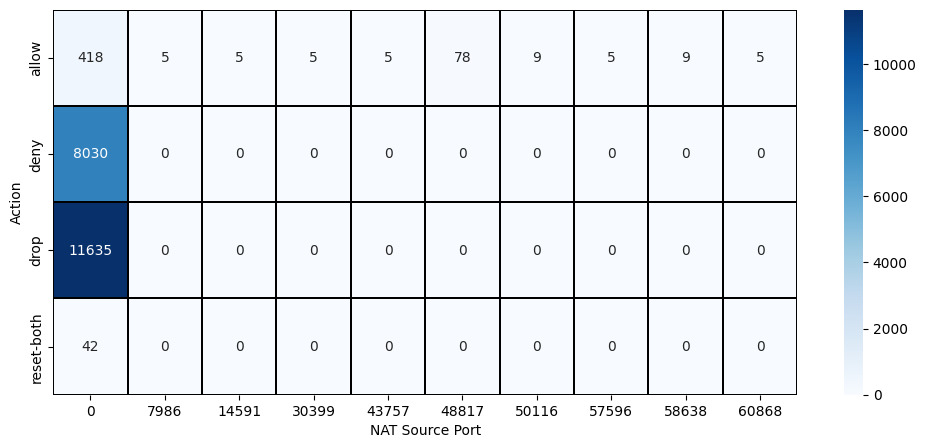

Feature:NAT Destination Port - Top 10 levels only


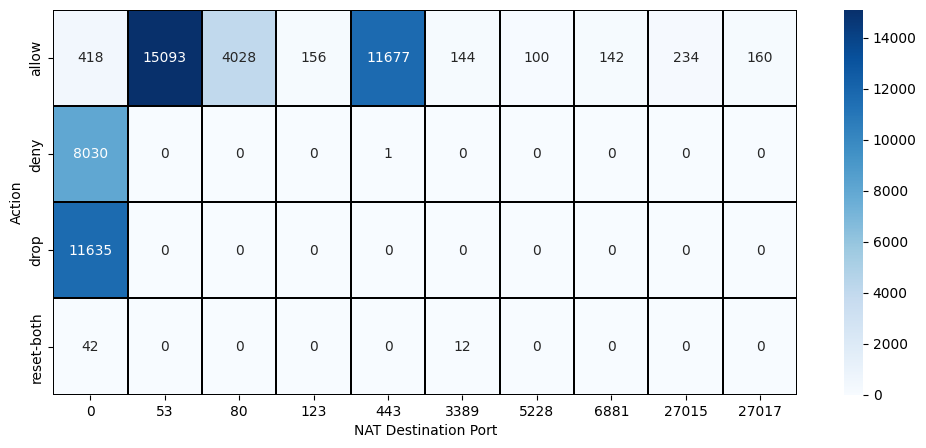

In [23]:
for f in categorical_features:
    top10_levels = df[f].value_counts()[0:10].index.to_list()
    df_temp = df[df[f].isin(top10_levels)]
    ctab = pd.crosstab(df_temp.Action, df_temp[f])
    print('Feature:' + f + ' - Top 10 levels only')
    plt.figure(figsize=(12,5))
    sns.heatmap(ctab, annot=True, fmt='d',
                cmap='Blues',
                linecolor='black',
                linewidths=0.1)
    plt.show()

Does the duration of network connections vary significantly between benign and potentially malicious traffic?

<ipython-input-24-daa5a3690334>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Action', y='Elapsed Time (sec)', data=df, palette='Set2')


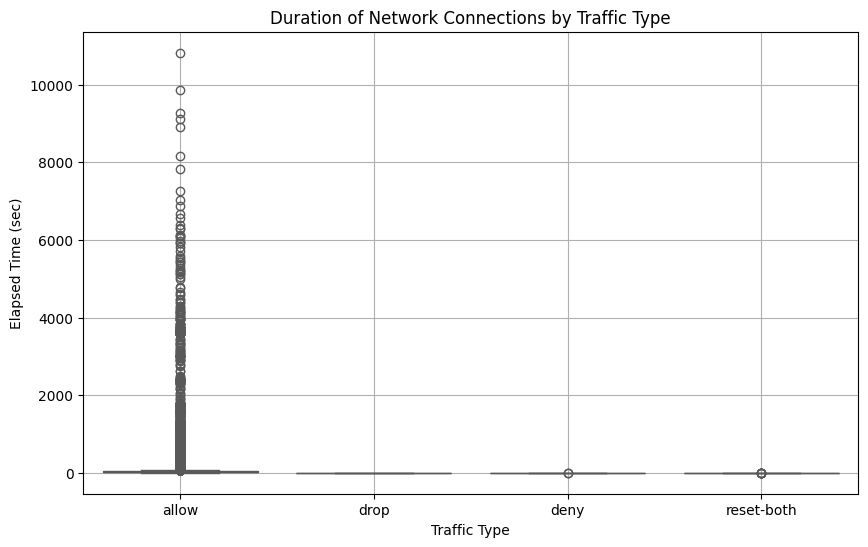

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the data into benign and potentially malicious traffic
benign_traffic = df[df['Action'] == 'allow']['Elapsed Time (sec)']
malicious_traffic = df[df['Action'].isin(['deny', 'drop', 'reset-both'])]['Elapsed Time (sec)']

# Visualize the distribution of elapsed time for benign and malicious traffic using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Action', y='Elapsed Time (sec)', data=df, palette='Set2')
plt.title('Duration of Network Connections by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Elapsed Time (sec)')
plt.grid(True)
plt.show()


In [25]:
from scipy.stats import mannwhitneyu

# Separate the data for benign and potentially malicious traffic
benign_duration = df[df['Action'] == 'allow']['Elapsed Time (sec)']
malicious_duration = df[df['Action'].isin(['deny', 'drop', 'reset-both'])]['Elapsed Time (sec)']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(benign_duration, malicious_duration)

# Print the results
print("Mann-Whitney U Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than", alpha)
    print("There is a significant difference in the duration of network connections between benign and potentially malicious traffic.")
else:
    print("The p-value is greater than or equal to", alpha)
    print("There is no significant difference in the duration of network connections between benign and potentially malicious traffic.")


Mann-Whitney U Test:
Statistic: 735629325.0
p-value: 0.0
The p-value is less than 0.05
There is a significant difference in the duration of network connections between benign and potentially malicious traffic.


Are there marked differences in the data volume (bytes sent and received) between allowed and denied traffic?

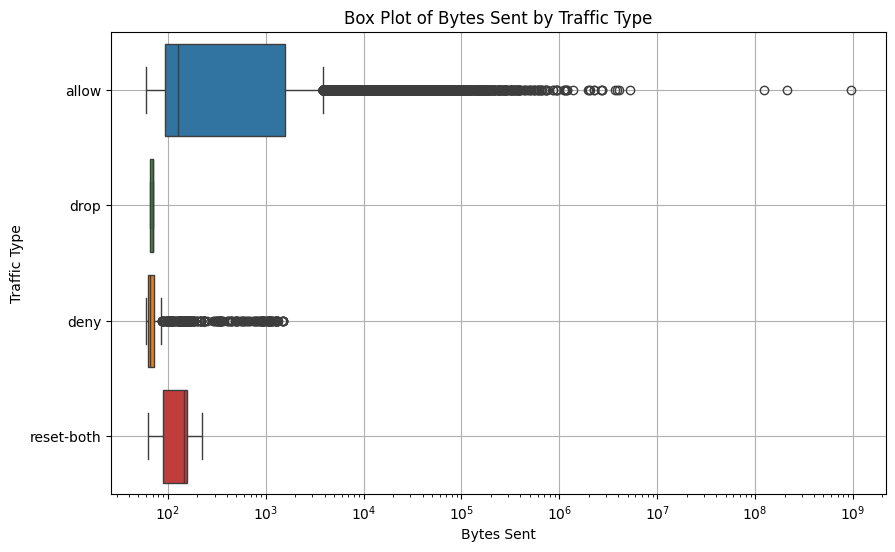

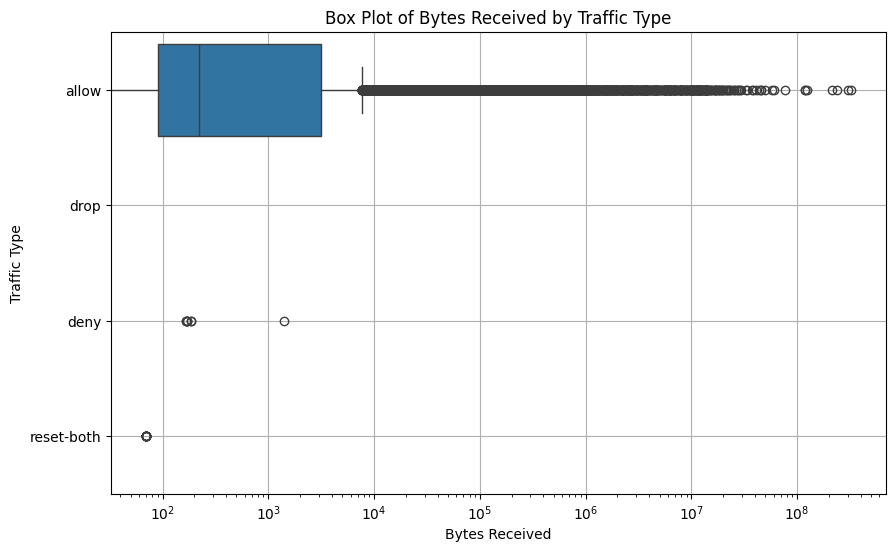

In [26]:
# Create box plots for bytes sent by traffic type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Bytes Sent', y='Action', hue='Action', hue_order=['allow', 'deny', 'drop', 'reset-both'], dodge=False)
plt.title('Box Plot of Bytes Sent by Traffic Type')
plt.xlabel('Bytes Sent')
plt.ylabel('Traffic Type')
plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.legend([], frameon=False)  # Remove the legend
plt.grid(True)
plt.show()

# Create box plots for bytes received by traffic type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Bytes Received', y='Action', hue='Action', hue_order=['allow', 'deny', 'drop', 'reset-both'], dodge=False)
plt.title('Box Plot of Bytes Received by Traffic Type')
plt.xlabel('Bytes Received')
plt.ylabel('Traffic Type')
plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.legend([], frameon=False)  # Remove the legend
plt.grid(True)
plt.show()



# Data Preprocessing

In [27]:
action_counts = df['Action'].value_counts()

# Print the counts
print("Action Counts:")
print(action_counts)

Action Counts:
Action
allow         37439
drop          11635
deny           8042
reset-both       54
Name: count, dtype: int64


Merge drop and reset-both

In [28]:
df['Action'] = df['Action'].replace({'reset-both':'drop'})
df['Action'].unique()

array(['allow', 'drop', 'deny'], dtype=object)

Split target

In [29]:
X = df.drop('Action', axis=1)
y = df['Action']

Sampling - Balancing Data

In [30]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = sampler.fit_resample(X, y)

# Convert back to DataFrame
df_res = pd.DataFrame(X_resampled, columns=X.columns)
df_res['Action'] = y_resampled

In [31]:
df_res.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Bytes_trafo,Packets_trafo,Elapsed Time (sec)_trafo
count,24126.000000,24126.000000,24126.000000,24126.000000,2.412600e+04,2.412600e+04,2.412600e+04,24126.000000,24126.000000,24126.000000,24126.000000,24126.000000,24126.000000,24126.000000
mean,48618.985700,13209.110710,11245.077468,1531.463193,3.707987e+04,1.458248e+03,3.562162e+04,40.714292,36.613943,14.161237,26.553055,5.190179,1.175010,1.224842
std,16451.724666,20083.362642,19295.677372,7510.547737,1.651306e+06,3.686685e+04,1.615274e+06,1623.614803,212.916436,547.344962,1080.102710,1.810884,1.065891,1.854264
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000,0.000000,1.000000,0.000000,4.110874,0.693147,0.000000
25%,48221.750000,443.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000,0.000000,1.000000,0.000000,4.204693,0.693147,0.000000
50%,53834.000000,445.000000,0.000000,0.000000,7.000000e+01,7.000000e+01,0.000000e+00,1.000000,0.000000,1.000000,0.000000,4.262680,0.693147,0.000000
75%,58970.500000,25174.000000,17151.500000,53.000000,1.960000e+02,1.100000e+02,9.100000e+01,2.000000,28.000000,1.000000,1.000000,5.283204,1.098612,3.367296
max,65533.000000,65504.000000,65520.000000,65253.000000,2.427356e+08,5.306961e+06,2.374286e+08,238334.000000,6660.000000,81340.000000,156994.000000,19.307483,12.381433,8.804025


Distribution after balancing

In [32]:
# Calculate the count for each action type after resampling
action_counts = pd.Series(y_resampled).value_counts()

# Print the counts
print("Action Counts after Resampling:")
print(action_counts)


Action Counts after Resampling:
Action
allow    8042
deny     8042
drop     8042
Name: count, dtype: int64


Normalization

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Standardize numerical features
X_resampled[numerical_features] = scaler.fit_transform(X_resampled[numerical_features])

Train-Test Split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Variance Threshold

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold

# Variance Thresholding
selector = VarianceThreshold(threshold=0.1)
X_filtered = selector.fit_transform(X_train)

# Correlation Analysis
selector = SelectKBest(score_func=f_classif, k=5)  # Choose appropriate score_func and k value
X_selected = selector.fit_transform(X_train, y_train)

In [36]:
# Get the indices of the selected features
selected_indices = selector.get_support()

# Get the column names of the selected features
selected_features = X_train.columns[selected_indices]

# Print the column names
print(selected_features)


Index(['Destination Port', 'NAT Source Port', 'Bytes_trafo', 'Packets_trafo',
       'Elapsed Time (sec)_trafo'],
      dtype='object')
